In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Relevant lists for code

In [2]:
# 2024 county list
county_list = [
    'Alameda', 
    'Amador',
    'Butte',
    'Calaveras',
    'Colusa',
    'Contra Costa',
    'El Dorado',
    'Fresno',
    'Glenn',
    'Humboldt',
    'Kern',
    'Kings',
    'Lake',
    'Lassen',
    'Los Angeles',
    'Madera',
    'Marin',
    'Mariposa',
    'Mendocino',
    'Merced',
    'Monterey',
    'Napa',
    'Nevada',
    'Orange',
    'Placer',
    'Riverside',
    'Sacramento',
    'San Benito',
    'San Bernardino',
    'San Diego',
    'San Joaquin',
    'San Luis Obispo',
    'San Mateo',
    'Santa Barbara',
    'Santa Clara',
    'Santa Cruz',
    'Shasta',
    'Siskiyou',
    'Solano',
    'Sonoma',
    'Stanislaus',
    'Sutter',
    'Tehama',
    'Trinity',
    'Tulare',
    'Tuolumne',
    'Ventura',
    'Yolo',
    'Yuba']

In [3]:
# 2000-2024 red wine grape varieties. use with isin for filtering dataframe for reds
red_variety = [
    'AGLIANICO',
    'ALICANTE BOUSCHET',
    'BARBERA',
    'BOUSCHET',
    'CABERNET FRANC',
    'CABERNET SAUVIGNON',
    'CARIGNANE',
    'CARMENERE',
    'CARMINE',
    'CARNELIAN',
    'CENTURIAN',
    'CHARBONO',
    'CINSAUT',
    'COUNOISE',
    'DOLCETTO',
    'DORNFELDER',
    'DURIF',
    'FREISA',
    'GAMAY',
    'GAMAY BEAUJOLAIS',
    'GRACIANO',
    'GRENACHE',
    'GRIGNOLINO',
    'LAGREIN',
    'LAMBRUSCO',
    'MALBEC',
    'MATARO',
    'MERLOT',
    'MEUNIER',
    'MISSION',
    'MONTEPULCIANO',
    'MOURVEDRE',
    'MUSCAT HAMBURG',
    'NEBBIOLO',
    "NERO D'AVOLA",
    'OTHER RED WINE',
    'PETIT VERDOT',
    'PETITE SIRAH ',
    'PINOT NOIR',
    'PINOTAGE',
    'PRIMITIVO',
    'ROYALTY',
    'RUBIRED',
    'RUBY CABERNET',
    'SALVADOR',
    'SANGIOVESE',
    'SANGIOVETO',
    'SOUZAO',
    'SYRAH',
    'TANNAT',
    'TEMPRANILLO',
    'TEROLDEGO',
    'TOURIGA FRANCESCA',
    'TOURIGA NACIONAL',
    'VALDIGUIE',
    'ZINFANDEL'   
]

In [4]:
# 2000-2024 white wine grape varieties. use with isin for filtering dataframe for whites
white_variety = [
    'ALBARINO',
    'ARNEIS',
    'BURGER',
    'CATARRATTO',
    'CHARDONNAY',
    'CHENIN BLANC',
    'EMERALD RIESLING',
    'FOLLE BLANCHE',
    'FRENCH COLOMBARD',
    'GEWURZTRAMINER',
    'GRAY RIESLING',
    'GRENACHE BLANC',
    'GRUNER VELTLINER',
    'HUNGARIAN MILLENIUM',
    'MALVASIA BIANCA',
    'MARSANNE',
    'MOSCATO GAILLO',
    'MUSCAT',
    'MUSCAT BLANC',
    'MUSCAT OF ALEXANDRIA',
    'MUSCAT ORANGE',
    'OTHER WHITE WINE',
    'PALOMINO',
    'PICPOUL BLANC',
    'PINOT BLANC',
    'PINOT GRIS',
    'ROUSSANNE',
    'SAUVIGNON BLANC',
    'SAUVIGNON MUSQUE',
    'SAUVIGNON VERT',
    'SEMILLON',
    'ST EMILION',
    'SYMPHONY',
    'TOCAI FRIULANO',
    'TRIPLETT BLANC',
    'VERDELHO',
    'VERMENTINO',
    'VIOGNIER',
    'WHITE RIESLING']

In [5]:
# if you want to do district-wide (more broad) vs county-wide (more granular) analysis
district_dict = {
    1: ['Mendocino'],
    2: ['Lake'],
    3: ['Sonoma', 'Marin'],
    4: ['Napa'],
    5: ['Solano'],
    6: ['Alameda', 'Contra Costa', 'Santa Clara', 'San Francisco', 'San Mateo', 'Santa Cruz Counties'],
    7: ['Monterey', 'San Benito'],
    8: ['San Luis Obispo', 'Santa Barbara', 'Ventura'],
    9: ['Yolo', 'Del Norte', 'Siskiyou', 'Modoc', 'Humboldt', 'Trinity', 'Shasta', 'Lassen', 'Tehama', 'Ventura',
       'Plumas', 'Glenn', 'Butte', 'Colusa', 'Sutter', 'Yub', 'Los Angeles', 'Sierra'],
    10: ['Nevada', 'Placer', 'El Dorado', 'Amador', 'Calaveras', 'Tuolumne', 'Mariposa'],
    11: ['San Joaquin',  'Sacramento'],
    12: ['San Joaquin County', 'Stanislaus', 'Merced'],
    13: ['Madera', 'Fresno', 'Alpine', 'Mono', 'Inyo','Kings','Tulare'],
    14: ['Kings', 'Tulare', 'Kern'],
    15: ['Los Angeles', 'San Bernardino'],
    16: ['Orange', 'Riverside', 'San Diego', 'Imperial'],
    17: ['Yolo', 'Sacramento']
}

In [6]:
# if you want to do an analysis of the Somm Series, look at the trends with the Noble Grapes
noble_grapes = [
    'CABERNET SAUVIGNON',
    'CHARDONNAY',
    'MERLOT',
    'PINOT NOIR',
    'WHITE RIESLING', # ONLY this riesling
    'SAUVIGNON BLANC',
    'GRENACHE',
    'MOSCATO GAILLO',
    'GEWURZTRAMINER',
    'SANGIOVESE',
    'NEBBIOLO',
    'SEMILLON',
    'TEMPRANILLO',
    'SYRAH', # not PETITE SYRAH
    'MALBEC',
    'PINOT GRIS',
    'CHENIN BLANC',
    'VIOGNIER'
    ]

# Setting up the Dataframe

Make sure all the relevant Excel files are in a folder called data (case sensitive). If it is not explictly called "data", it will not work unless you change the code I have. Otherwise, determine your file path to the data folder and assign it below as the variable "path".

NOTE: My project only uses 2003-2024, but there is data from 2000-2024. Furthermore, despite only using 2 sheets for this project, my Excel files all have 7 sheets total. Please be sure to read the Excel files portion of the README to avoid any errors.

In [7]:
path = 'C:/Users/lilli/Documents/NSS/Python/projects/lillianargang-nss-capstone/data/'
# this is my local file path. You will want to put yours.

In [8]:
# this will transform the Excel files into a dataframe

def load_wine_dataframes(path, file, sheet_name, year):
    file_path = path + file
    df = pd.read_excel(file_path, sheet_name)
    df['year'] = year
    df = df.rename(columns={df.columns[0]:'variety/county',
                            df.columns[10]:'bearing_acre',
                            df.columns[11]:'non-bearing_acre',
                            df.columns[12]:'total_acre',})
    df = df.drop(columns=[df.columns[1],
                          df.columns[2],
                          df.columns[3],
                          df.columns[4],
                          df.columns[5],
                          df.columns[6],
                          df.columns[7],
                          df.columns[8],
                          df.columns[9],
                          df.columns[13]])
    
    return df

### White varieties

In [9]:
# this will load and transform each year's file (white wine only)

white_2024 = load_wine_dataframes(path, '2024_wine.xlsx', 3, 2024)
white_2023 = load_wine_dataframes(path, '2023_wine.xlsx', 3, 2023)
white_2022 = load_wine_dataframes(path, '2022_wine.xlsx', 3, 2022)
white_2021 = load_wine_dataframes(path, '2021_wine.xlsx', 3, 2021)
white_2020 = load_wine_dataframes(path, '2020_wine.xlsx', 3, 2020)
white_2019 = load_wine_dataframes(path, '2019_wine.xlsx', 3, 2019)
white_2018 = load_wine_dataframes(path, '2018_wine.xlsx', 3, 2018)
white_2017 = load_wine_dataframes(path, '2017_wine.xlsx', 3, 2017)
white_2016 = load_wine_dataframes(path, '2016_wine.xlsx', 3, 2016)
white_2015 = load_wine_dataframes(path, '2015_wine.xlsx', 3, 2015)
white_2014 = load_wine_dataframes(path, '2014_wine.xlsx', 3, 2014)
white_2013 = load_wine_dataframes(path, '2013_wine.xlsx', 3, 2013)
white_2012 = load_wine_dataframes(path, '2012_wine.xlsx', 3, 2012)
white_2011 = load_wine_dataframes(path, '2011_wine.xlsx', 3, 2011)
white_2010 = load_wine_dataframes(path, '2010_wine.xlsx', 3, 2010)
white_2009 = load_wine_dataframes(path, '2009_wine.xlsx', 3, 2009)
white_2008 = load_wine_dataframes(path, '2008_wine.xlsx', 3, 2008)
white_2007 = load_wine_dataframes(path, '2007_wine.xlsx', 3, 2007)
white_2006 = load_wine_dataframes(path, '2006_wine.xlsx', 3, 2006)
white_2005 = load_wine_dataframes(path, '2005_wine.xlsx', 3, 2005)
white_2004 = load_wine_dataframes(path, '2004_wine.xlsx', 3, 2004)
white_2003 = load_wine_dataframes(path, '2003_wine.xlsx', 3, 2003)
white_2002 = load_wine_dataframes(path, '2002_wine.xlsx', 3, 2002)
white_2001 = load_wine_dataframes(path, '2001_wine.xlsx', 3, 2001)
white_2000 = load_wine_dataframes(path, '2000_wine.xlsx', 3, 2000)

### Red varieties

In [10]:
# this will load and transform each year's file (red wine only)

red_2024 = load_wine_dataframes(path, '2024_wine.xlsx', 4, 2024)
red_2023 = load_wine_dataframes(path, '2023_wine.xlsx', 4, 2023)
red_2022 = load_wine_dataframes(path, '2022_wine.xlsx', 4, 2022)
red_2021 = load_wine_dataframes(path, '2021_wine.xlsx', 4, 2021)
red_2020 = load_wine_dataframes(path, '2020_wine.xlsx', 4, 2020)
red_2019 = load_wine_dataframes(path, '2019_wine.xlsx', 4, 2019)
red_2018 = load_wine_dataframes(path, '2018_wine.xlsx', 4, 2018)
red_2017 = load_wine_dataframes(path, '2017_wine.xlsx', 4, 2017)
red_2016 = load_wine_dataframes(path, '2016_wine.xlsx', 4, 2016)
red_2015 = load_wine_dataframes(path, '2015_wine.xlsx', 4, 2015)
red_2014 = load_wine_dataframes(path, '2014_wine.xlsx', 4, 2014)
red_2013 = load_wine_dataframes(path, '2013_wine.xlsx', 4, 2013)
red_2012 = load_wine_dataframes(path, '2012_wine.xlsx', 4, 2012)
red_2011 = load_wine_dataframes(path, '2011_wine.xlsx', 4, 2011)
red_2010 = load_wine_dataframes(path, '2010_wine.xlsx', 4, 2010)
red_2009 = load_wine_dataframes(path, '2009_wine.xlsx', 4, 2009)
red_2008 = load_wine_dataframes(path, '2008_wine.xlsx', 4, 2008)
red_2007 = load_wine_dataframes(path, '2007_wine.xlsx', 4, 2007)
red_2006 = load_wine_dataframes(path, '2006_wine.xlsx', 4, 2006)
red_2005 = load_wine_dataframes(path, '2005_wine.xlsx', 4, 2005)
red_2004 = load_wine_dataframes(path, '2004_wine.xlsx', 4, 2004)
red_2003 = load_wine_dataframes(path, '2003_wine.xlsx', 4, 2003)
red_2002 = load_wine_dataframes(path, '2002_wine.xlsx', 4, 2002)
red_2001 = load_wine_dataframes(path, '2001_wine.xlsx', 4, 2001)
red_2000 = load_wine_dataframes(path, '2000_wine.xlsx', 4, 2000)

### Concat your data to a single dataframe

In [11]:
# this will concat all of the red wine data

red_concat = pd.concat([
    red_2024,
    red_2023,
    red_2022,
    red_2021,
    red_2020,
    red_2019,
    red_2018,
    red_2017,
    red_2016,
    red_2015,
    red_2014,
    red_2013,
    red_2012,
    red_2011,
    red_2010,
    red_2009,
    red_2008,
    red_2007,
    red_2006,
    red_2005,
    red_2004,
    red_2003,
    red_2002,
    red_2001,
    red_2000], axis=0, ignore_index=True)

In [12]:
# this will concat all of the white wine data

white_concat = pd.concat([
    white_2024,
    white_2023,
    white_2022,
    white_2021,
    white_2020,
    white_2019,
    white_2018,
    white_2017,
    white_2016,
    white_2015,
    white_2014,
    white_2013,
    white_2012,
    white_2011,
    white_2010,
    white_2009,
    white_2008,
    white_2007,
    white_2006,
    white_2005,
    white_2004,
    white_2003,
    white_2002,
    white_2001,
    white_2000], axis=0, ignore_index=True)

In [13]:
# this will concat the white and red frames together, making cleaning from here simpler

final_concat = pd.concat([red_concat, white_concat], axis=0, ignore_index=True)
# going forward, you can use the white_variety or red_variety lists to filter the dataframe by red/white variety

## Use Regex to clean data from Excel

In [14]:
data = final_concat['variety/county']

data = data.str.strip()
data = data.str.replace(r'\W+[*]', '', regex=True)
#r'' = raw string, \W = not a word, + = one or more, [*] = select * within string, literal *
data = data.str.replace('*', '')
data = data.str.replace( r"\W[(]Cont'd[.]?[)]", '', regex=True )
#r"" = raw string, \W = not a word (a blank space), [(] = select ( within string, Cont'd = "Cont'd", [.] = select literal . ,
    #? = zero or one (characters)
data = data.str.replace( r'GAMAY.*', 'GAMAY', regex=True)
#r'' = raw string, . = any character (except line break), * = zero or more times the character appears
data = data.str.replace( r'.*MUSCAT OF.*', 'OF ALEXANDRIA', regex=True)
#r'' = raw string, . = any character (except line break), * = zero or more times the character appears, MUSCAT OF = 'MUSCAT OF',
    #. = any character (except line break), * = zero or more times the character appears
    #replacing any instances of MUSCAT OF or MUSCAT MUSCAT OF with OF ALEXANDRIA, to transform from there (next line)
data = data.str.replace('OF ALEXANDRIA', 'MUSCAT OF ALEXANDRIA')
data = data.str.replace('ALEXANDRIA', 'MUSCAT OF ALEXANDRIA')
data = data.str.replace(r'ST[.]\W*', 'ST ', regex=True)
#r'' = raw string, ST = 'ST', [.] = select literal . , \W = not a word, * = zero or more times the character appears
data = data.str.replace('SYRAH NOIR', 'SYRAH')
data = data.str.replace( r'San Luis Obispo*', 'San Luis Obispo', regex=True)
#r'' = raw string, San Luis Obispo = 'San Luis Obispo', * = zero or more times the character appears
data = data.str.replace('Siskyou', 'Siskiyou')
data = data.str.replace('Tuolomne', 'Tuolumne')
data= data.str.replace('CABERNET CABERNET SAUVIGNON', 'CABERNET SAUVIGNON')

In [15]:
set(data)
# use to compare regex changes to unique values in column

{'    Synonyms for variety names are shown on Page 3',
 '    Synonyms for variety names are shown on Page 3 of the Overview file.',
 '    Synonyms for variety names are shown on Page 5.',
 '  Synonyms for variety names are shown on Page 2.',
 '  Synonyms for variety names are shown on Page 3.',
 '  Synonyms for variety names are shown on Page 4.',
 ' Synonyms for variety names are shown on Page 3 of the Overview file.',
 "(Cont'd.)",
 '1  Totals may not add due to rounding.',
 '1/  Totals may not add due to rounding.',
 '2  Non-bearing years are 2018, 2019 and 2020.',
 '2  Non-bearing years are 2019, 2020 and 2021.',
 '2  Non-bearing years are 2020, 2021 and 2022.',
 '2  Non-bearing years are 2021, 2022 and 2023.',
 '2  Non-bearing years are 2022, 2023 and 2024.',
 '2/  Non-bearing years are 2004, 2005, and 2006.',
 '2/  Non-bearing years are 2005, 2006, and 2007.',
 '2/  Non-bearing years are 2006, 2007, and 2008.',
 '2/  Non-bearing years are 2007, 2008, and 2009.',
 '2/  Non-bearing

In [16]:
final_concat['variety/county'] = data
# set cleaned data to final_concat['variety/county']

## Make a column for varieties

In [17]:
# this loop says: "when you find an uppercase word (variety), hold it in current_value and place in a list until you find a new uppercase word. repeat."
current_value = '' # placeholder
variety_list = []

for value in final_concat['variety/county']:
    if str(value).isupper():
        current_value = value # stay on upper value (variety are in upper)
    variety_list.append(current_value)       

In [18]:
final_concat['variety'] = variety_list

In [19]:
final_clean = final_concat.rename(columns={'variety/county':'county'})
# rename split variety/county columns

wine_final = final_clean[final_clean['county'].isin(county_list)].reset_index()
# use to maintain correct county list, dropping any aggregates ('State Total')

In [20]:
set(wine_final['variety'])
# double check unique values in column

{'AGLIANICO',
 'ALBARINO',
 'ALICANTE BOUSCHET',
 'ARNEIS',
 'BARBERA',
 'BOUSCHET',
 'BURGER',
 'CABERNET FRANC',
 'CABERNET SAUVIGNON',
 'CARIGNANE',
 'CARMENERE',
 'CARMINE',
 'CARNELIAN',
 'CATARRATTO',
 'CENTURIAN',
 'CHARBONO',
 'CHARDONNAY',
 'CHENIN BLANC',
 'CINSAUT',
 'COUNOISE',
 'DOLCETTO',
 'DORNFELDER',
 'DURIF',
 'EMERALD RIESLING',
 'FOLLE BLANCHE',
 'FREISA',
 'FRENCH COLOMBARD',
 'GAMAY',
 'GEWURZTRAMINER',
 'GRACIANO',
 'GRAY RIESLING',
 'GRENACHE',
 'GRENACHE BLANC',
 'GRIGNOLINO',
 'GRUNER VELTLINER',
 'HUNGARIAN MILLENIUM',
 'LAGREIN',
 'LAMBRUSCO',
 'MALBEC',
 'MALVASIA BIANCA',
 'MARSANNE',
 'MATARO',
 'MERLOT',
 'MEUNIER',
 'MISSION',
 'MONTEPULCIANO',
 'MOSCATO GAILLO',
 'MOURVEDRE',
 'MUSCAT BLANC',
 'MUSCAT HAMBURG',
 'MUSCAT OF ALEXANDRIA',
 'MUSCAT OF MUSCAT OF ALEXANDRIA',
 'MUSCAT ORANGE',
 'NEBBIOLO',
 "NERO D'AVOLA",
 'OTHER RED WINE',
 'OTHER WHITE WINE',
 'PALOMINO',
 'PETIT VERDOT',
 'PETITE SIRAH',
 'PICPOUL BLANC',
 'PINOT BLANC',
 'PINOT GRIS',
 

## Data Questions

In [21]:
# over all years, how many unique varieties are found in each county
wine_final.groupby('county')['variety'].nunique()

county
Alameda            44
Amador             56
Butte              29
Calaveras          52
Colusa             16
Contra Costa       42
El Dorado          68
Fresno             60
Glenn              17
Humboldt           21
Kern               45
Kings              30
Lake               50
Lassen              6
Los Angeles        24
Madera             66
Marin              16
Mariposa           19
Mendocino          67
Merced             40
Monterey           63
Napa               78
Nevada             40
Orange              3
Placer             35
Riverside          69
Sacramento         53
San Benito         47
San Bernardino     29
San Diego          54
San Joaquin        82
San Luis Obispo    75
San Mateo          15
Santa Barbara      64
Santa Clara        51
Santa Cruz         27
Shasta             26
Siskiyou           14
Solano             51
Sonoma             85
Stanislaus         44
Sutter             19
Tehama             29
Trinity            22
Tulare             53
Tuo

In [22]:
# by year, unique variety count by county
wine_final.groupby(['year', 'county'])['variety'].nunique()

year  county   
2000  Alameda      28
      Amador       31
      Butte         6
      Calaveras    20
      Colusa        7
                   ..
2024  Tulare       28
      Tuolumne     16
      Ventura      19
      Yolo         44
      Yuba         13
Name: variety, Length: 1196, dtype: int64

In [23]:
# varieties increasing/decreasing over time
distribution_grouped = wine_final.groupby(['year', 'variety'])['bearing_acre'].sum().reset_index()
distribution_grouped

,year,variety,bearing_acre
0,2000,ALICANTE BOUSCHET,1403
1,2000,BARBERA,10566
2,2000,BURGER,1837
3,2000,CABERNET FRANC,2382
4,2000,CABERNET SAUVIGNON,48286
...,...,...,...
1796,2024,VERDELHO,149
1797,2024,VERMENTINO,140
1798,2024,VIOGNIER,2422
1799,2024,WHITE RIESLING,2638


In [24]:
# 1. What are the top 10 varieties, varying across all relevant years (2003-2024), in terms of bearing acres?

variety_2024 = distribution_grouped[distribution_grouped['year'] == 2024].sort_values('bearing_acre', ascending=False).head(12)['variety'].to_list()
variety_2003 = distribution_grouped[distribution_grouped['year'] == 2003].sort_values('bearing_acre', ascending=False).head(12)['variety'].to_list()
top_varieties_list = list(set(variety_2003 + variety_2024)) 
top_varieties_list.remove('OTHER WHITE WINE')
top_varieties_list.remove('OTHER RED WINE')
top_varieties_list.remove('TOTAL WHITE WINE')
top_varieties_list.remove('TOTAL RED WINE')
# this is a simplified list of lists by pulling just 2024 and 2003 and making them into a set

top_varieties_list
# there are 12 in the list due to varying top 10s per year

['PETITE SIRAH',
 'PINOT NOIR',
 'MERLOT',
 'CHARDONNAY',
 'RUBIRED',
 'CHENIN BLANC',
 'SAUVIGNON BLANC',
 'PINOT GRIS',
 'FRENCH COLOMBARD',
 'CABERNET SAUVIGNON',
 'ZINFANDEL',
 'SYRAH']

In [25]:
# 2. What's the total bearing acreage per year, for each of the Top 12?

# Top Varieties filter + years
filtered_wine = wine_final[
    (wine_final['year'] >= 2003) &
    (wine_final['year'] <= 2024) &
    (wine_final['variety'].isin(top_varieties_list))]

In [26]:
# All varieties, only year filter
filtered_updated = wine_final[
    (wine_final['year'] >= 2003) &
    (wine_final['year'] <= 2024)]

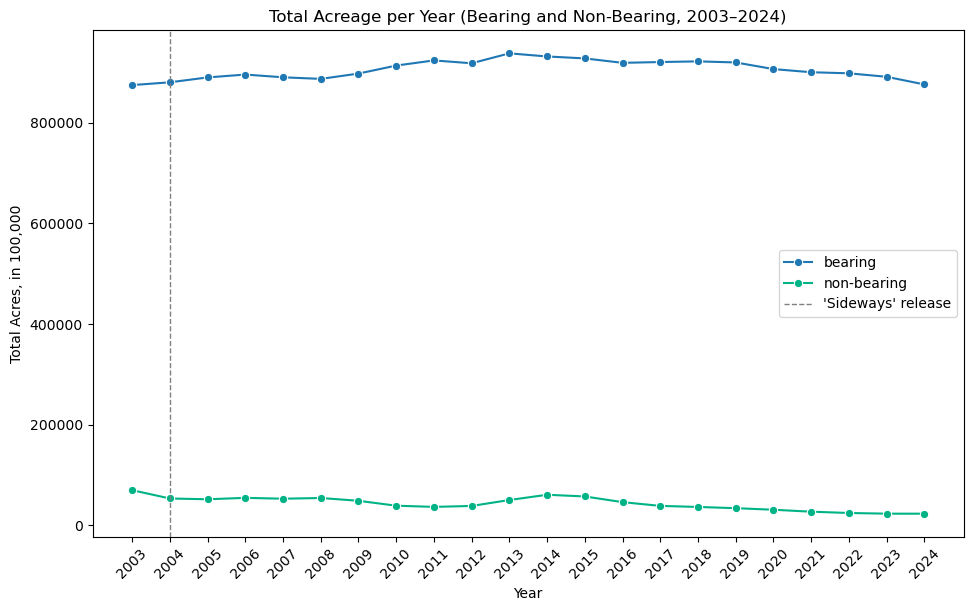

In [27]:
# What does bearing vs non-bearing look like, overall?

bearing_acreage = filtered_updated.groupby('year')['bearing_acre'].sum().reset_index()
non_acreage = filtered_updated.groupby('year')['non-bearing_acre'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=bearing_acreage, x='year', y='bearing_acre', marker='o', label='bearing')
sns.lineplot(data=non_acreage, x='year', y='non-bearing_acre', marker='o', color='#00b386', label='non-bearing')

plt.axvline(x=2004, color='gray', linestyle='--', linewidth=1, label="'Sideways' release")
plt.title('Total Acreage per Year (Bearing and Non-Bearing, 2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Acres, in 100,000')

plt.tight_layout() # auto-adjust padding for cleaner look #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.xticks(range(2003, 2025, 1)) # https://stackoverflow.com/questions/56713197/how-to-change-the-xticks-to-a-specific-range
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [28]:
# 3. How has acreage per year for varieties in the Top 12 changed over time?
# make charts for each variety, showing how each top variety has changed over 2005-2024

varieties_grouped = filtered_updated.groupby(['year', 'variety'])['bearing_acre'].sum().reset_index()
# the sum of bearing_acre by year, by variety

varieties_grouped_non = filtered_updated.groupby(['year', 'variety'])['non-bearing_acre'].sum().reset_index()
# the sum of non-bearing_acre by year, by variety

varieties_grouped_total = filtered_updated.groupby(['year', 'variety'])['total_acre'].sum().reset_index()
# the sum of total_acre by year, by variety

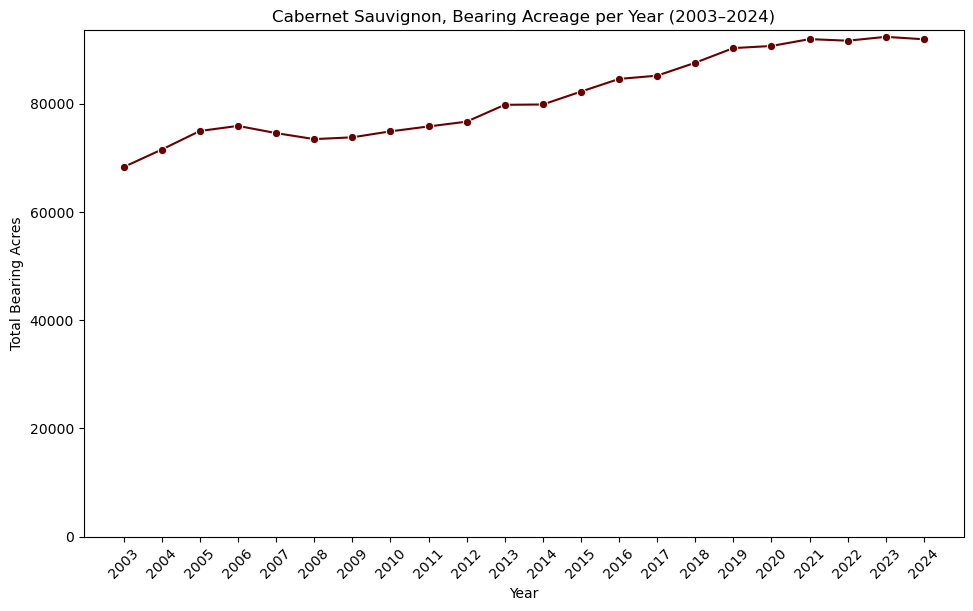

In [29]:
# looking to make a plot of each Top Variety, for each year

grouped_cab = varieties_grouped[varieties_grouped['variety'] == 'CABERNET SAUVIGNON']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_cab, x='year', y='bearing_acre', marker='o', color='#660000')
plt.ylim(0)

plt.title('Cabernet Sauvignon, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.xticks(rotation=45)
plt.show()

In [30]:
cab_df = grouped_cab.reset_index()

# relative change (in %)
cab_df['pct_change'] = cab_df['bearing_acre'].pct_change().round(4) * 100
cab_mean = cab_df['pct_change'].mean().round(2) # mean percent change = 1.44

# absolute change (in acres)
cab_df['acre_diff'] = cab_df['bearing_acre'].diff()
cab_acre_mean = cab_df['acre_diff'].mean() # 1124
cab_acre_mean = round(cab_acre_mean)

# standard deviation
cab_std = cab_df['pct_change'].std()
cab_std_rounded = round(cab_std, 2) # std = 1.85

cab_df

C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\3942175028.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cab_df['pct_change'] = cab_df['bearing_acre'].pct_change().round(4) * 100


,index,year,variety,bearing_acre,pct_change,acre_diff
0,4,2003,CABERNET SAUVIGNON,68308,NaN,NaN
1,68,2004,CABERNET SAUVIGNON,71540,4.73,3232
2,133,2005,CABERNET SAUVIGNON,74972,4.80,3432
3,201,2006,CABERNET SAUVIGNON,75909,1.25,937
4,270,2007,CABERNET SAUVIGNON,74579,-1.75,-1330
5,339,2008,CABERNET SAUVIGNON,73468,-1.49,-1111
6,411,2009,CABERNET SAUVIGNON,73797,0.45,329
7,484,2010,CABERNET SAUVIGNON,74900,1.49,1103
8,559,2011,CABERNET SAUVIGNON,75805,1.21,905
9,634,2012,CABERNET SAUVIGNON,76692,1.17,887


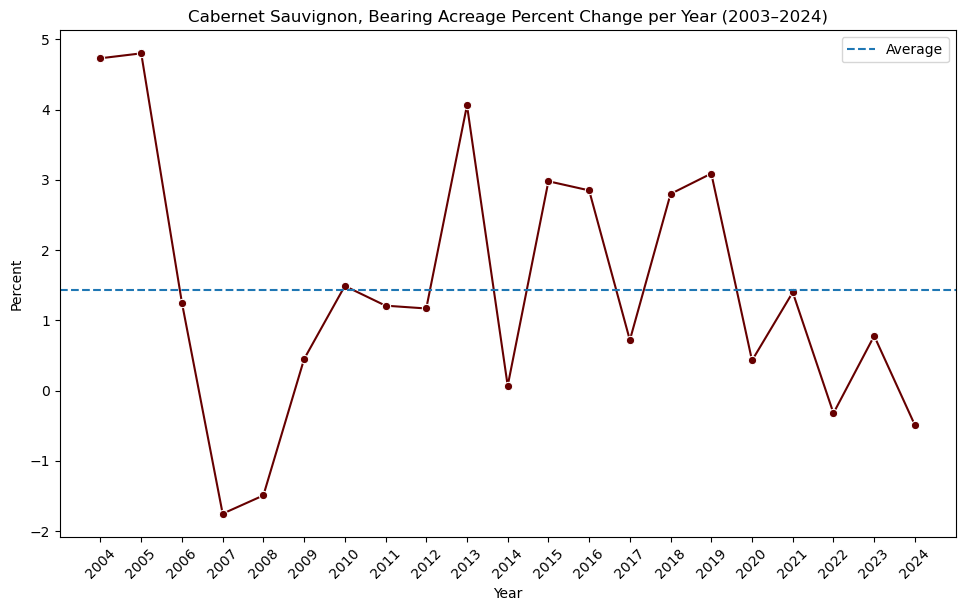

In [31]:
cab_pct = cab_df[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=cab_pct, x='year', y='pct_change', marker='o', color='#660000' )

plt.title('Cabernet Sauvignon, Bearing Acreage Percent Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.axhline(y=1.44, linestyle='--', label='Average')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

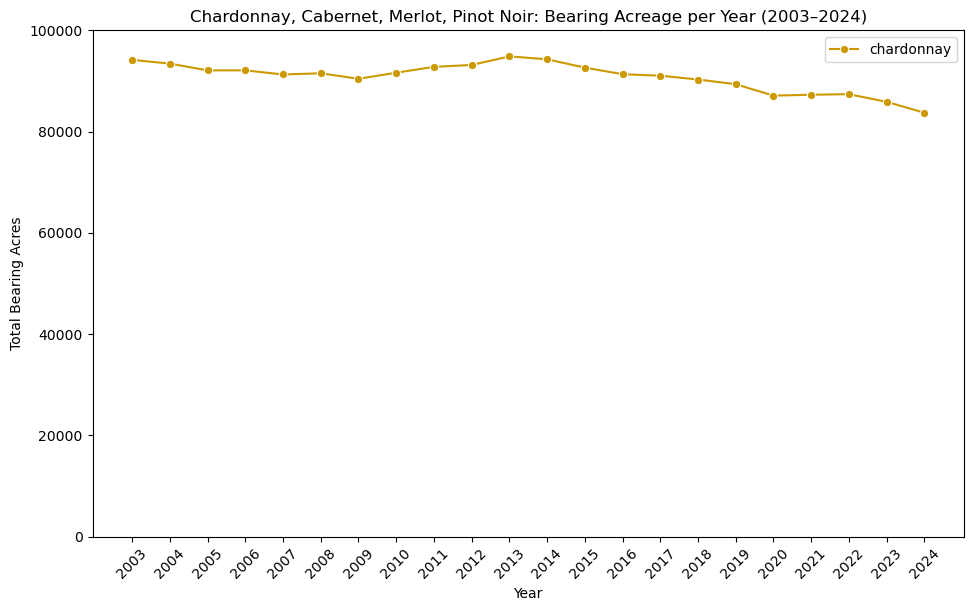

In [32]:
grouped_chard = varieties_grouped[varieties_grouped['variety'] == 'CHARDONNAY']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_chard, x='year', y='bearing_acre', marker='o', color='#cc9900', label='chardonnay')
#sns.lineplot(data=grouped_cab, x='year', y='bearing_acre', marker='o', color='#660000', label='cabernet')
#sns.lineplot(data=grouped_merlot, x='year', y='bearing_acre', marker='o', color='#8a0f78', label='merlot')
#sns.lineplot(data=grouped_noir, x='year', y='bearing_acre', marker='o', color='#EC1363', label='pinot noir')

plt.ylim(bottom= 0, top=100000)
plt.title('Chardonnay, Cabernet, Merlot, Pinot Noir: Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.legend()
plt.xticks(range(2003, 2025, 1))
plt.xticks(rotation=45)
plt.show()

In [33]:
chard_df = grouped_chard.reset_index()

# relative change (in %)
chard_df['pct_change'] = chard_df['bearing_acre'].pct_change().round(4) * 100
chard_mean = chard_df['pct_change'].mean().round(2) # mean percent change = -0.55

# absolute change (in acres)
chard_df['acre_diff'] = chard_df['bearing_acre'].diff()
chard_acre_mean = chard_df['acre_diff'].mean() # -497

# standard deviation
chard_std = chard_df['pct_change'].std()
chard_std_rounded = round(chard_std, 2) # std = 1.19%

C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\808853601.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chard_df['pct_change'] = chard_df['bearing_acre'].pct_change().round(4) * 100


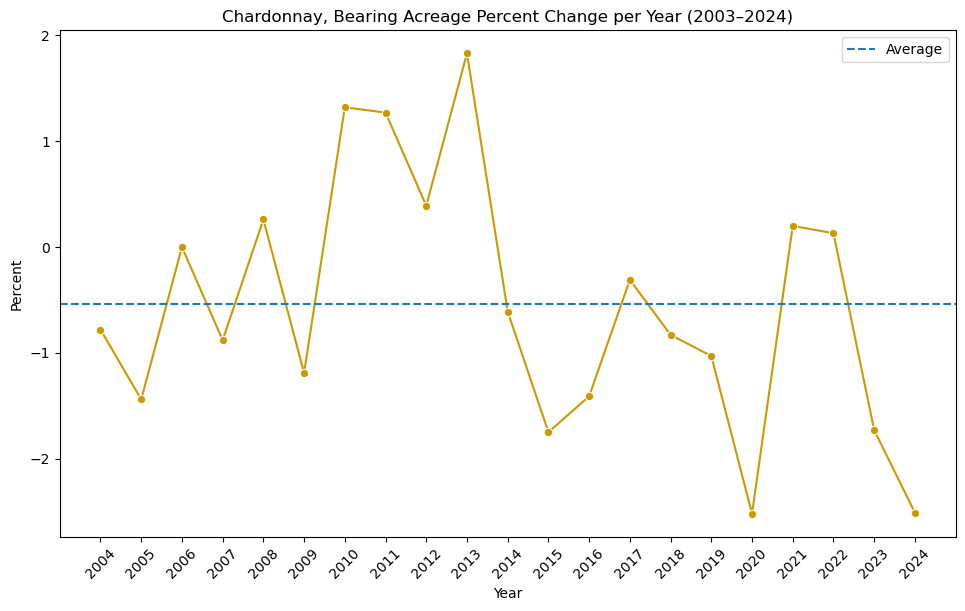

In [34]:
chard_pct = chard_df[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=chard_pct, x='year', y='pct_change', marker='o', color= '#cc9900')

plt.title('Chardonnay, Bearing Acreage Percent Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.axhline(y=-0.54, linestyle='--', label='Average')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

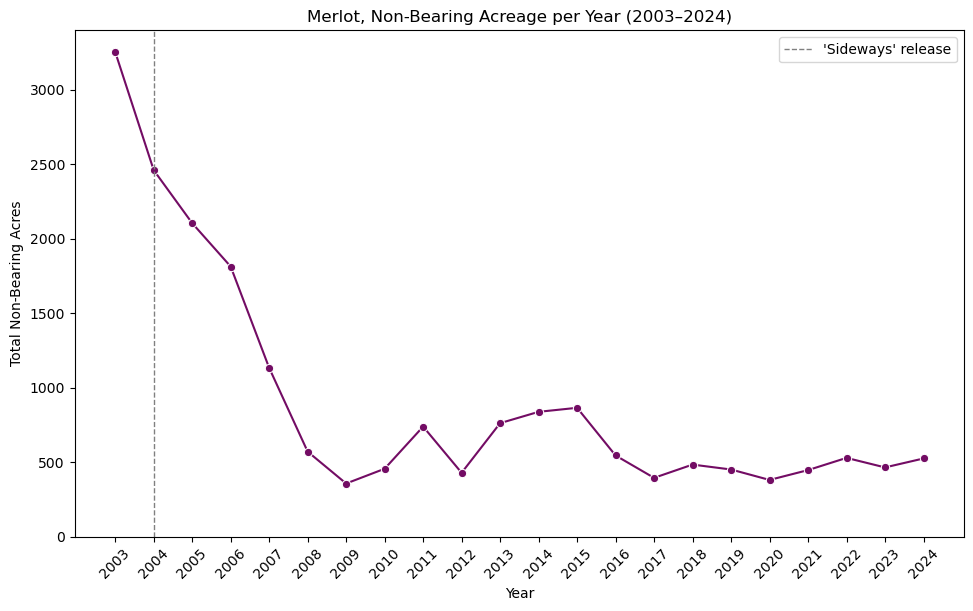

In [35]:
grouped_merlot_non = varieties_grouped_non[varieties_grouped['variety'] == 'MERLOT']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_merlot_non, x='year', y='non-bearing_acre', marker='o', color='#730C64')
plt.ylim(bottom=0)

plt.title('Merlot, Non-Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Non-Bearing Acres')
plt.axvline(x=2004, color='gray', linestyle='--', linewidth=1, label="'Sideways' release")

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\162824446.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grouped_merlot_non['pct_change'] = grouped_merlot_non['non-bearing_acre'].pct_change().round(3) * 100
C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\162824446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_merlot_non['pct_change'] = grouped_merlot_non['non-bearing_acre'].pct_change().round(3) * 100


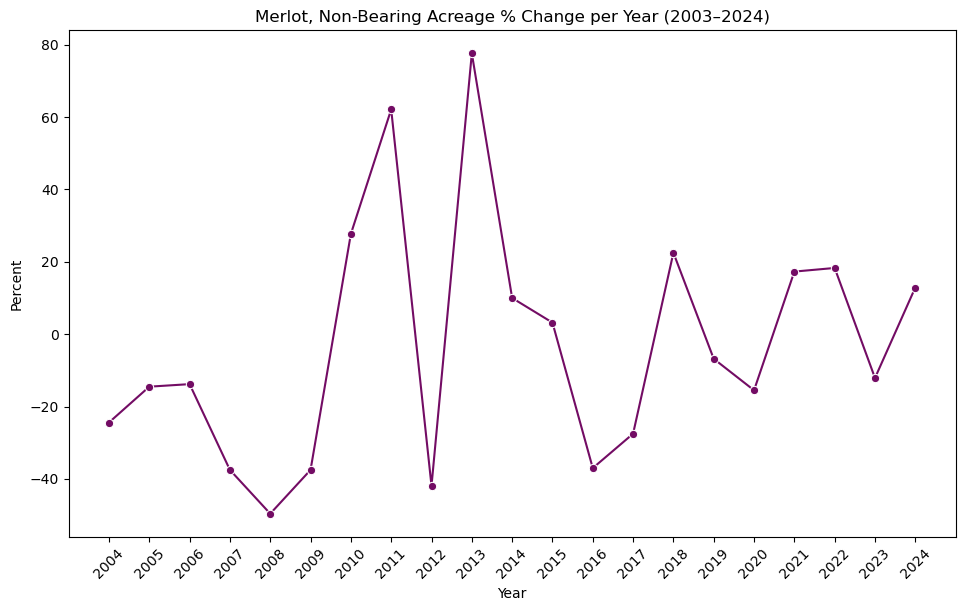

In [36]:
grouped_merlot_non['pct_change'] = grouped_merlot_non['non-bearing_acre'].pct_change().round(3) * 100

merlot_pct_non = grouped_merlot_non[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=merlot_pct_non, x='year', y='pct_change', marker='o', color='#730C64')

plt.title('Merlot, Non-Bearing Acreage % Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.show()

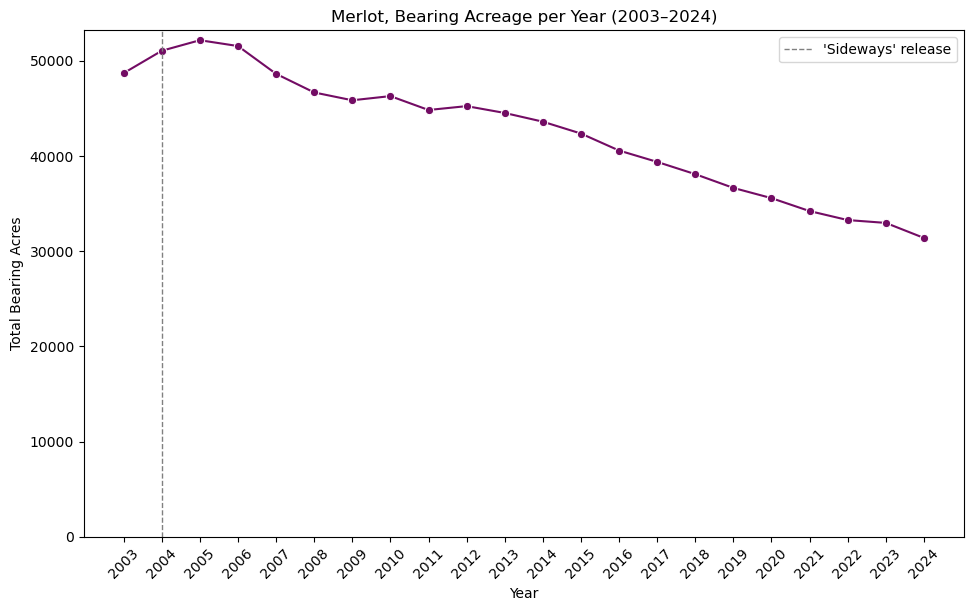

In [37]:
grouped_merlot = varieties_grouped[varieties_grouped['variety'] == 'MERLOT']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_merlot, x='year', y='bearing_acre', marker='o', color='#730C64')
plt.ylim(bottom=0)

plt.title('Merlot, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')
plt.axvline(x=2004, color='gray', linestyle='--', linewidth=1, label="'Sideways' release")

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [38]:
merlot_df = grouped_merlot.reset_index()

# relative change (in %)
merlot_df['pct_change'] = merlot_df['bearing_acre'].pct_change().round(3) * 100
merlot_mean = merlot_df['pct_change'].mean().round(2) # mean percent change = -2.05

# absolute change (in acres)
merlot_df['acre_diff'] = merlot_df['bearing_acre'].diff()
merlot_acre_mean = merlot_df['acre_diff'].mean() # -825
merlot_acre_mean = round(merlot_acre_mean)

# standard deviation (absolute variability)
merlot_std = merlot_df['pct_change'].std()
merlot_std_rounded = round(merlot_std, 2) #2.51

C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\3269272033.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merlot_df['pct_change'] = merlot_df['bearing_acre'].pct_change().round(3) * 100


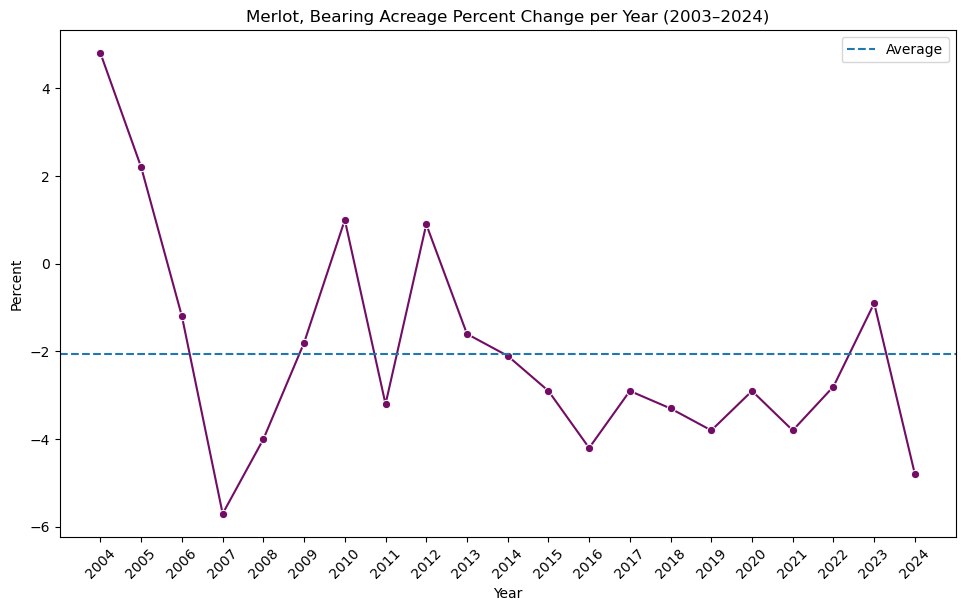

In [39]:
merlot_pct = merlot_df[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=merlot_pct, x='year', y='pct_change', marker='o', color= '#730C64')

plt.title('Merlot, Bearing Acreage Percent Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.axhline(y=-2.05, linestyle='--', label='Average')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

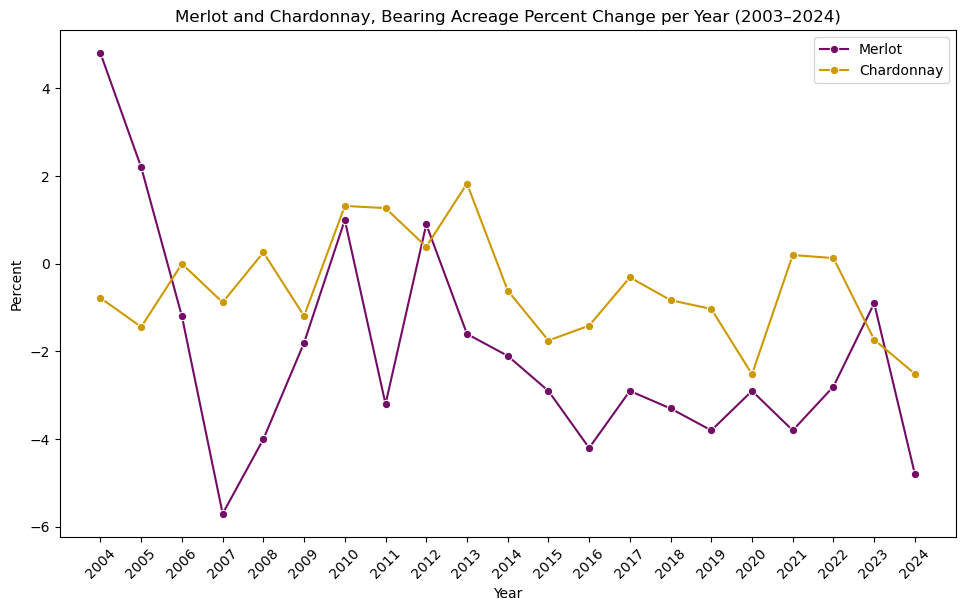

In [40]:
merlot_pct = merlot_df[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=merlot_pct, x='year', y='pct_change', marker='o', color= '#730C64', label='Merlot')
sns.lineplot(data=chard_pct, x='year', y='pct_change', marker='o', color= '#cc9900', label='Chardonnay')

plt.title('Merlot and Chardonnay, Bearing Acreage Percent Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

#plt.axhline(y=-2.05, linestyle='--', label='Average')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

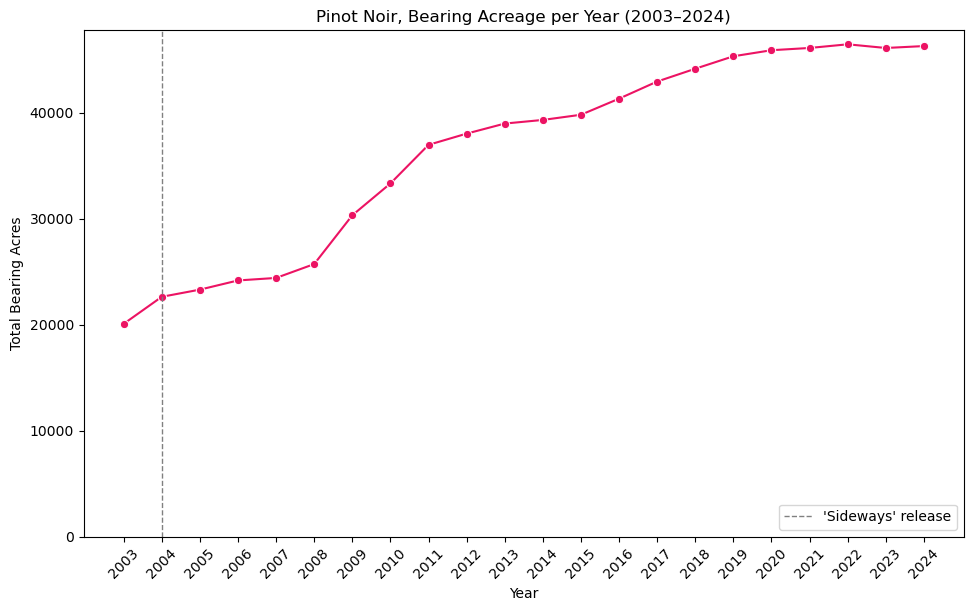

In [41]:
grouped_noir = varieties_grouped[varieties_grouped['variety'] == 'PINOT NOIR']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_noir, x='year', y='bearing_acre', marker='o', color='#EC1363')
plt.ylim(bottom=0)

plt.title('Pinot Noir, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')
plt.axvline(x=2004, color='gray', linestyle='--', linewidth=1, label="'Sideways' release")

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

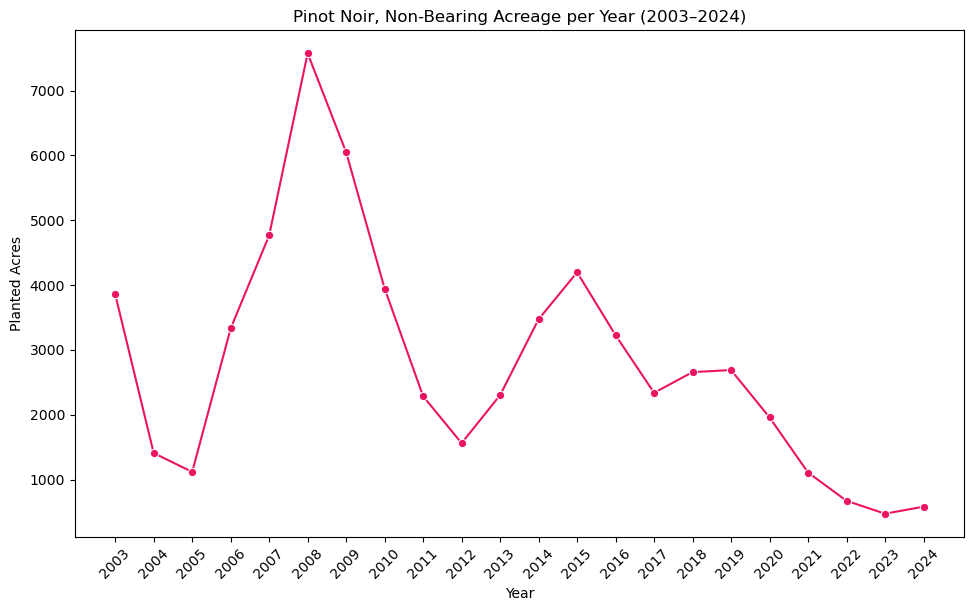

In [42]:
grouped_noir_non = varieties_grouped_non[varieties_grouped_non['variety'] == 'PINOT NOIR']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_noir_non, x='year', y='non-bearing_acre', marker='o', color='#EC1363')

plt.title('Pinot Noir, Non-Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Planted Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.xticks(rotation=45)
plt.show()



In [43]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
noir_df = grouped_noir.reset_index()

# relative change (in %)
noir_df['pct_change'] = noir_df['bearing_acre'].pct_change().round(3) * 100
noir_mean = noir_df['pct_change'].mean().round(2) # average percent change = 4.16

# absolute change (in acres)
noir_df['acre_diff'] = noir_df['bearing_acre'].diff()
noir_acre_mean = noir_df['acre_diff'].mean() # 1249
noir_acre_mean = round(noir_acre_mean)

# standard deviation
noir_std = noir_df['pct_change'].std()
noir_std_rounded = round(noir_std, 2) # standard deviation (of percent change) = 4.76

C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\2257024178.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  noir_df['pct_change'] = noir_df['bearing_acre'].pct_change().round(3) * 100


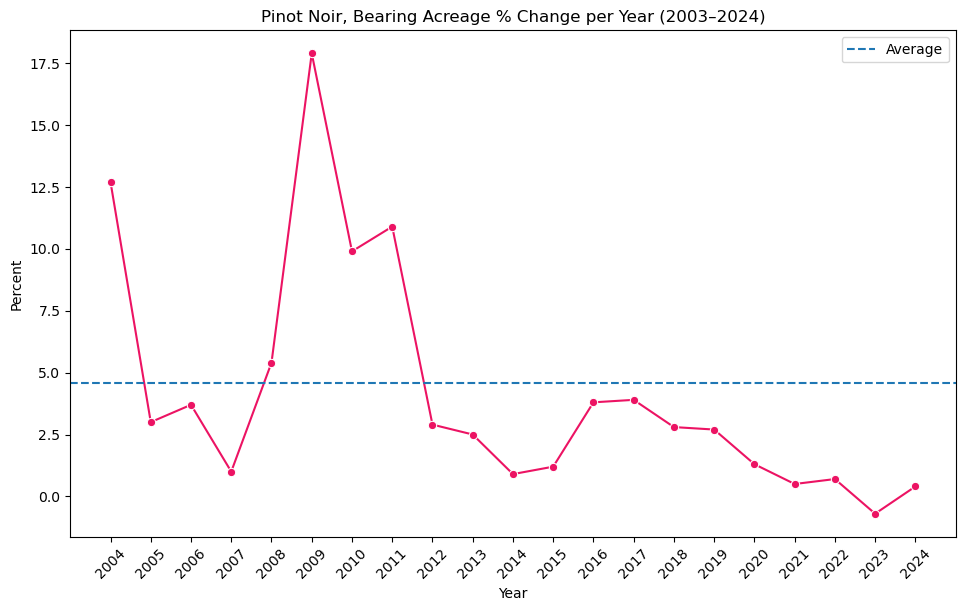

In [44]:
noir_pct = noir_df[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=noir_pct, x='year', y='pct_change', marker='o', color='#EC1363')

plt.title('Pinot Noir, Bearing Acreage % Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.axhline(y=4.6, linestyle='--', label='Average')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

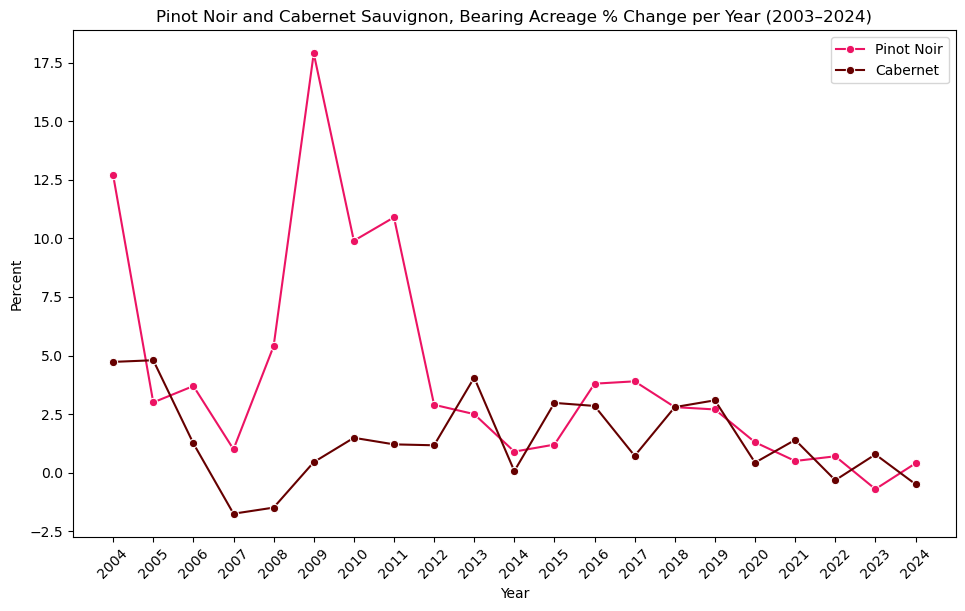

In [45]:
noir_pct = noir_df[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=noir_pct, x='year', y='pct_change', marker='o', color='#EC1363', label='Pinot Noir')
sns.lineplot(data=cab_pct, x='year', y='pct_change', marker='o', color= '#660000', label= 'Cabernet')

plt.title('Pinot Noir and Cabernet Sauvignon, Bearing Acreage % Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

#plt.axhline(y=4.6, linestyle='--', label='Average')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.legend()
plt.show()

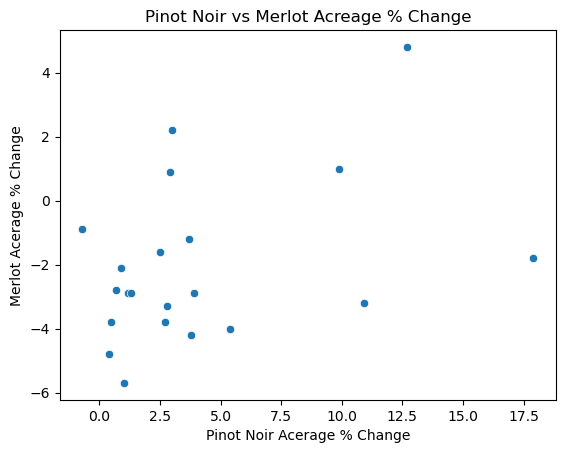

In [46]:
noir_pct = noir_pct['pct_change'].rename('noir_pct')
merlot_pct = merlot_pct['pct_change'].rename('merlot_pct')

merlot_noir_pct = pd.concat([noir_pct, merlot_pct], axis=1).dropna()

sns.scatterplot(x=merlot_noir_pct['noir_pct'], y=merlot_noir_pct['merlot_pct'])
plt.xlabel('Pinot Noir Acerage % Change')
plt.ylabel('Merlot Acerage % Change')
plt.title('Pinot Noir vs Merlot Acreage % Change')
plt.show()

In [47]:
spearman_corr = merlot_noir_pct.corr(method='spearman')
spearman_corr

,noir_pct,merlot_pct
noir_pct,1.000000,0.277724
merlot_pct,0.277724,1.000000


In [48]:
merlot_noir_corr = merlot_noir_pct['noir_pct'].corr(merlot_noir_pct['merlot_pct'])

merlot_noir_corr # 0.4

np.float64(0.39790391093303873)

In [49]:
cab_pct = cab_pct['pct_change'].rename('cab_pct')
chard_pct = chard_pct['pct_change'].rename('chard_pct')

cab_chard_pct = pd.concat([cab_pct, chard_pct], axis=1).dropna()

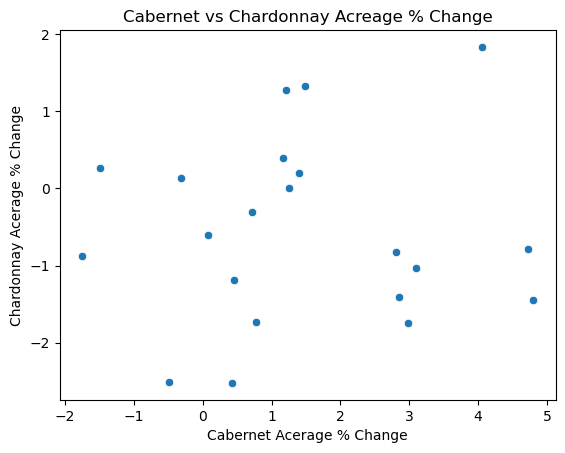

In [50]:
sns.scatterplot(x=cab_chard_pct['cab_pct'], y=cab_chard_pct['chard_pct'])
plt.xlabel('Cabernet Acerage % Change')
plt.ylabel('Chardonnay Acerage % Change')
plt.title('Cabernet vs Chardonnay Acreage % Change')
plt.show()

In [51]:
cab_chard_corr = cab_chard_pct['cab_pct'].corr(cab_chard_pct['chard_pct'])

cab_chard_corr # 0.05

np.float64(0.04806290431274771)

C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\329544291.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grouped_noir_non['pct_change'] = grouped_noir_non['non-bearing_acre'].pct_change().round(3) * 100
C:\Users\lilli\AppData\Local\Temp\ipykernel_5224\329544291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_noir_non['pct_change'] = grouped_noir_non['non-bearing_acre'].pct_change().round(3) * 100


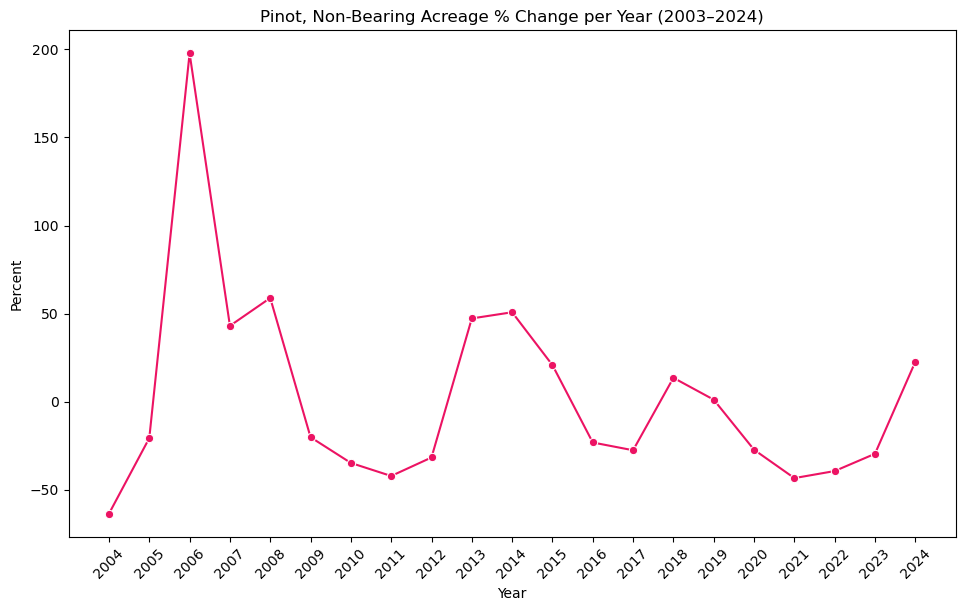

In [52]:
grouped_noir_non = varieties_grouped_non[varieties_grouped_non['variety'] == 'PINOT NOIR']
grouped_noir_non['pct_change'] = grouped_noir_non['non-bearing_acre'].pct_change().round(3) * 100

noir_pct_non = grouped_noir_non[['year', 'pct_change']]

plt.figure(figsize=(10,6))
sns.lineplot(data=noir_pct_non, x='year', y='pct_change', marker='o', color='#EC1363')

plt.title('Pinot, Non-Bearing Acreage % Change per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.tight_layout()
plt.xticks(range(2004, 2025, 1))
plt.xticks(rotation=45)
plt.show()

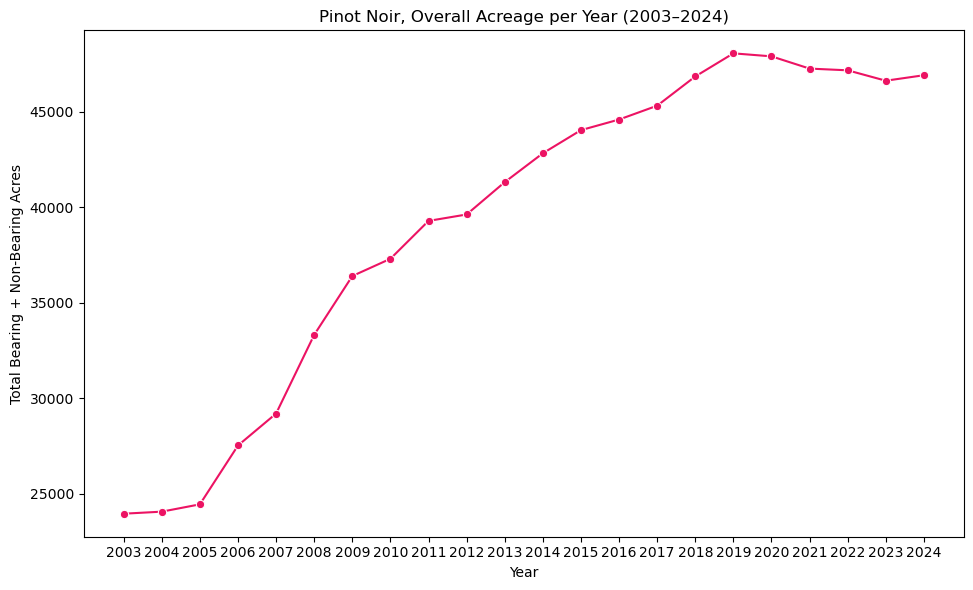

In [53]:
grouped_noir_total = varieties_grouped_total[varieties_grouped_total['variety'] == 'PINOT NOIR']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_noir_total, x='year', y='total_acre', marker='o', color='#EC1363')

plt.title('Pinot Noir, Overall Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing + Non-Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

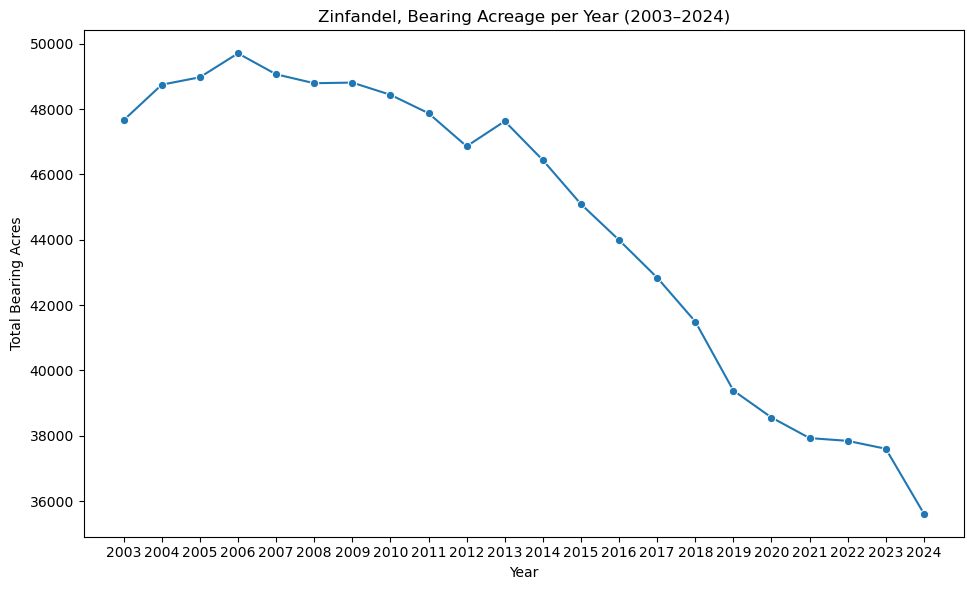

In [54]:
grouped_zin = varieties_grouped[varieties_grouped['variety'] == 'ZINFANDEL']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_zin, x='year', y='bearing_acre', marker='o')

plt.title('Zinfandel, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

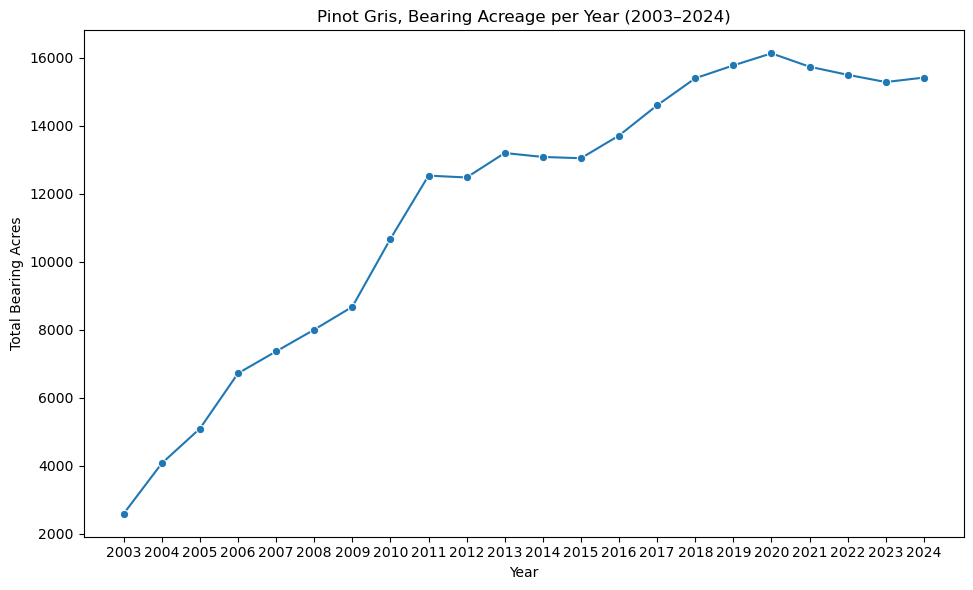

In [55]:
grouped_gris = varieties_grouped[varieties_grouped['variety'] == 'PINOT GRIS']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_gris, x='year', y='bearing_acre', marker='o')

plt.title('Pinot Gris, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

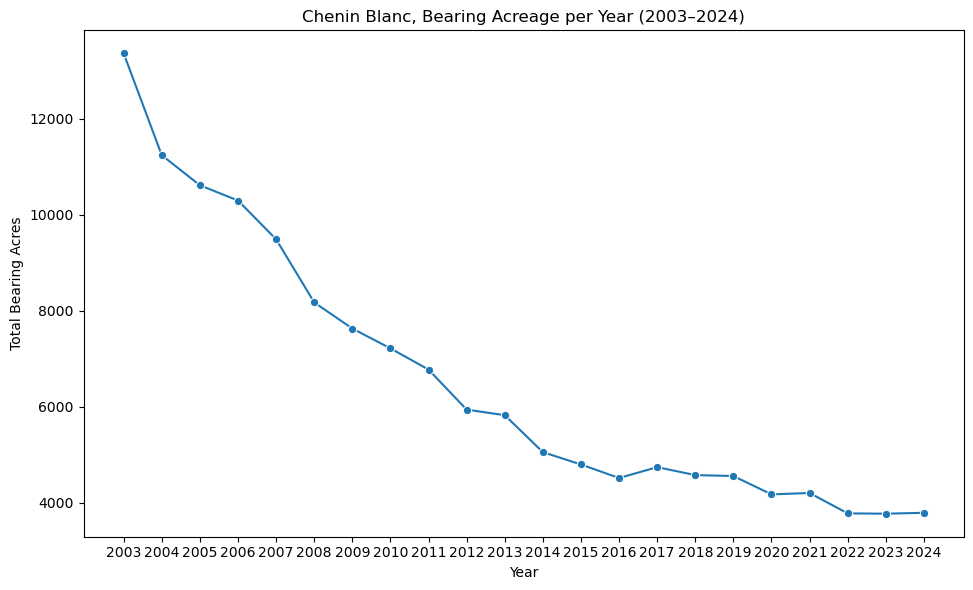

In [58]:
grouped_chenin = varieties_grouped[varieties_grouped['variety'] == 'CHENIN BLANC']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_chenin, x='year', y='bearing_acre', marker='o')

plt.title('Chenin Blanc, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

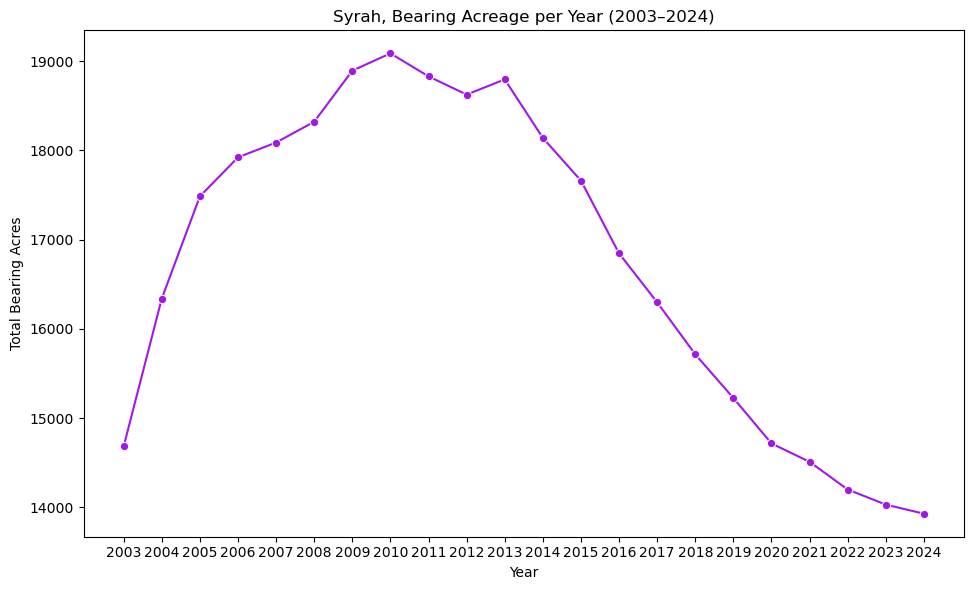

In [59]:
grouped_syrah = varieties_grouped[varieties_grouped['variety'] == 'SYRAH']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_syrah, x='year', y='bearing_acre', marker='o', color='#a217e8')

plt.title('Syrah, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

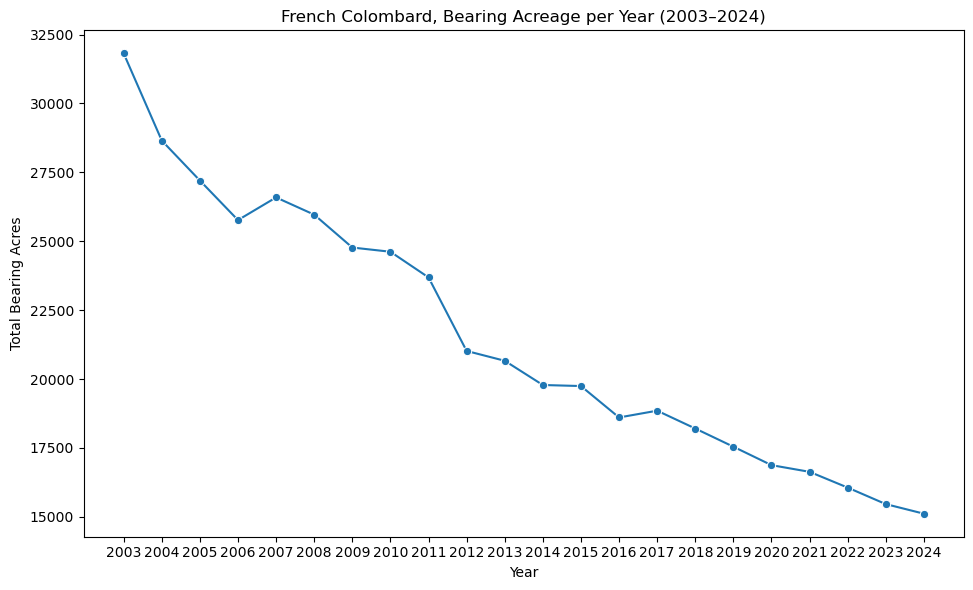

In [80]:
grouped_colombard = varieties_grouped[varieties_grouped['variety'] == 'FRENCH COLOMBARD']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_colombard, x='year', y='bearing_acre', marker='o')

plt.title('French Colombard, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

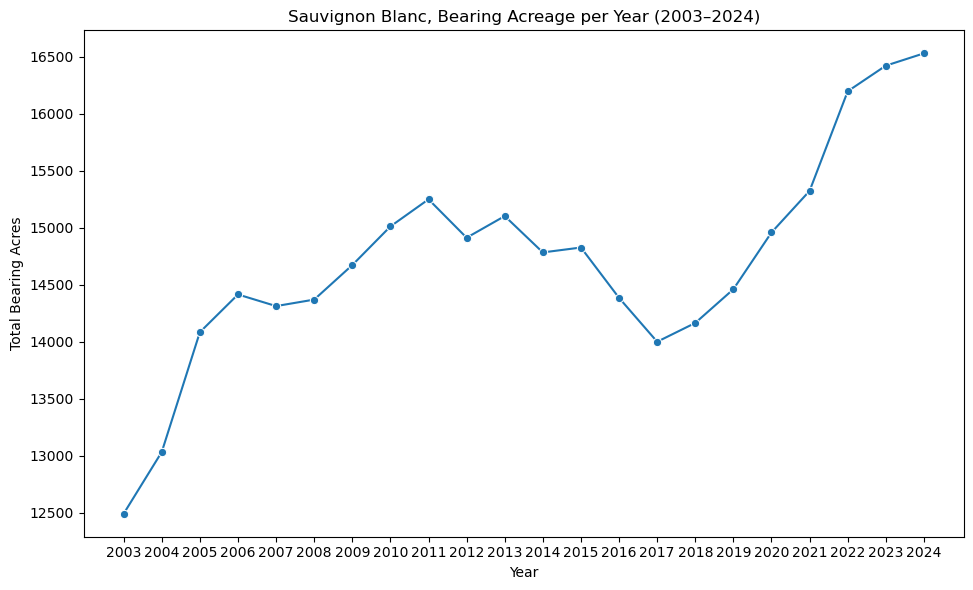

In [142]:
grouped_sauvblanc = varieties_grouped[varieties_grouped['variety'] == 'SAUVIGNON BLANC']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_sauvblanc, x='year', y='bearing_acre', marker='o')

plt.title('Sauvignon Blanc, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

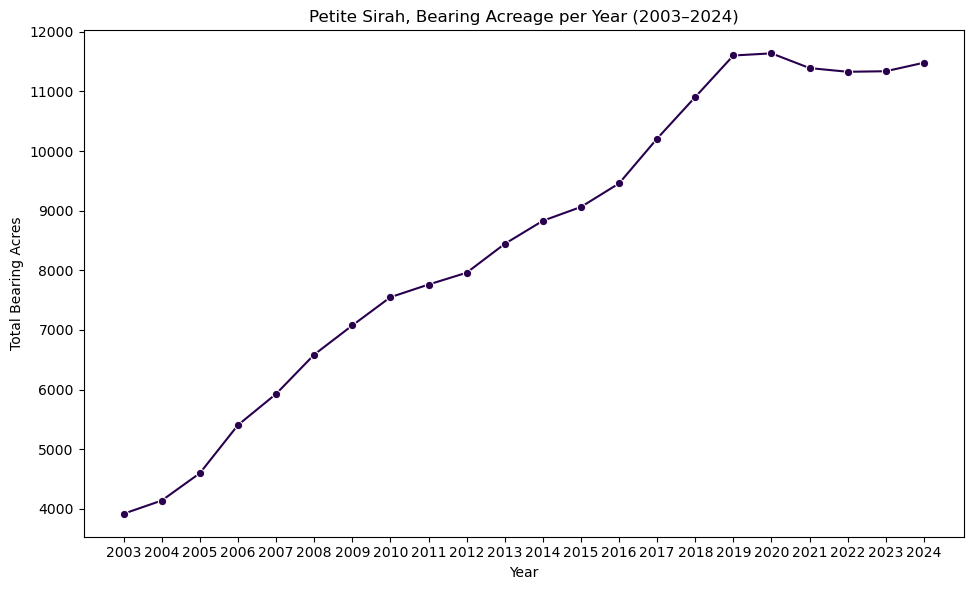

In [143]:
grouped_petite = varieties_grouped[varieties_grouped['variety'] == 'PETITE SIRAH']


plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_petite, x='year', y='bearing_acre', marker='o', color='#28004d')

plt.title('Petite Sirah, Bearing Acreage per Year (2003–2024)')
plt.xlabel('Year')
plt.ylabel('Total Bearing Acres')

plt.tight_layout()
plt.xticks(range(2003, 2025, 1))
plt.show()

In [144]:
##GOOGLE TRENDS
# 1. Per year, how does each variety scale on Google searches?

In [145]:
# 2. Are increases in Top Variety acreage associated with increases in Top Variety online actvity?

In [146]:
#https://pypi.org/project/pytrends/
from pytrends.request import TrendReq

# connect to google
pytrends = TrendReq(hl='en-US', tz=360)

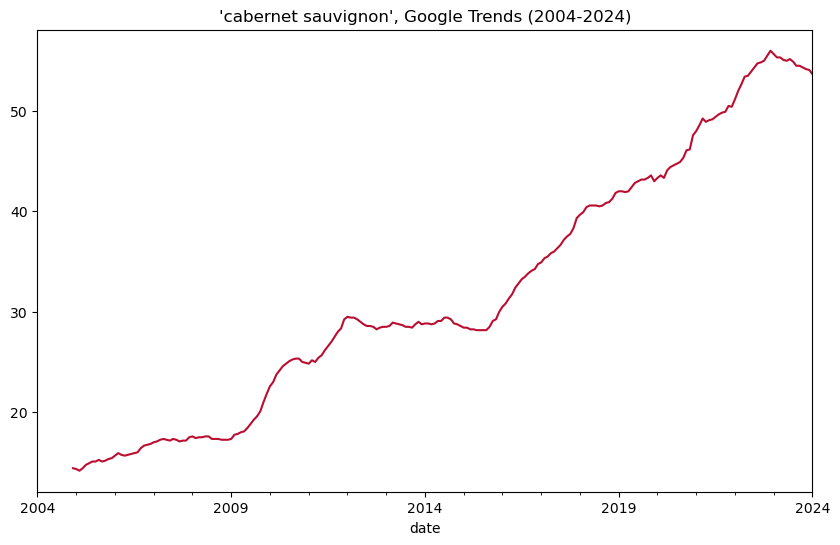

In [147]:
kw_cab = ['cabernet sauvignon', 'cabernet sauvignon wine'] #second is not relevant data
pytrends.build_payload(kw_cab, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

cab_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
# data is chaotic, as it is daily data- smooth broad time series data with moving averages https://www.investopedia.com/terms/d/data-smoothing.asp
cab_data['moving_avg'] = cab_data['cabernet sauvignon'].rolling(window=12).mean() # 12 because the data is monthly
# rolling averages how-to - https://www.youtube.com/watch?v=FYji-5S8D2s
cab_data['moving_avg'].plot(color='#BA0E31')
plt.title("'cabernet sauvignon', Google Trends (2004-2024)")
plt.show()


# plot documentation - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# moving averages in pandas - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

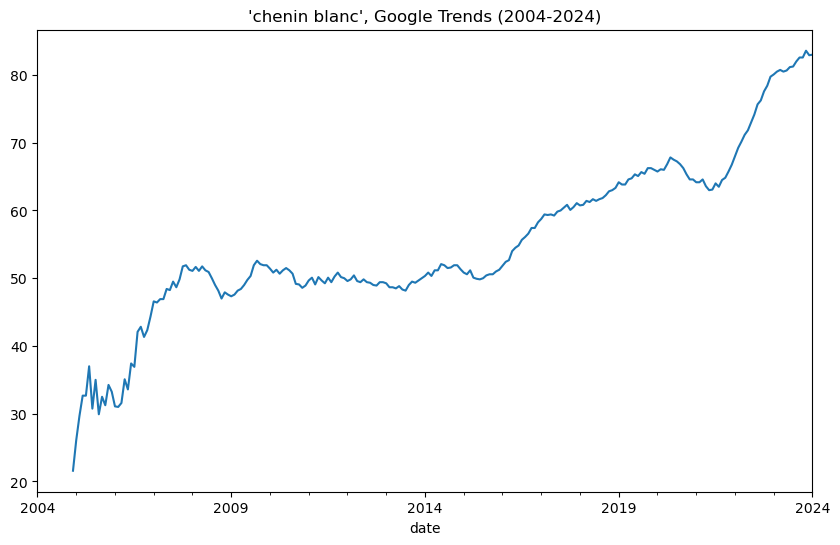

In [148]:
kw_chenin = ['chenin blanc']
pytrends.build_payload(kw_chenin, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

chenin_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
chenin_data['moving_avg'] = chenin_data['chenin blanc'].rolling(window=12).mean()
chenin_data['moving_avg'].plot()
plt.title("'chenin blanc', Google Trends (2004-2024)")
plt.show()

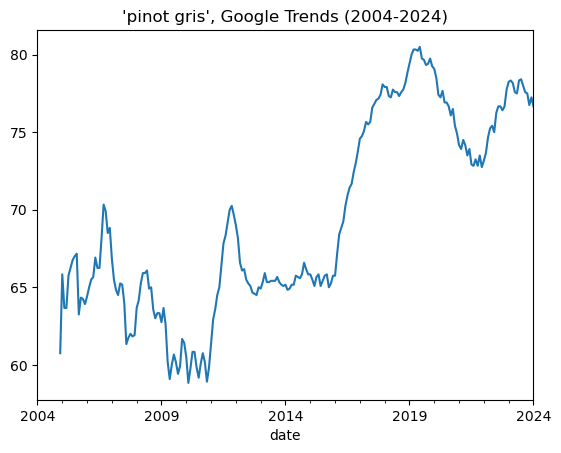

In [149]:
kw_gris = ['pinot gris']
pytrends.build_payload(kw_gris, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

gris_data = pytrends.interest_over_time()
gris_data['moving_avg'] = gris_data['pinot gris'].rolling(window=12).mean()
gris_data['moving_avg'].plot()
plt.title("'pinot gris', Google Trends (2004-2024)")
plt.show()

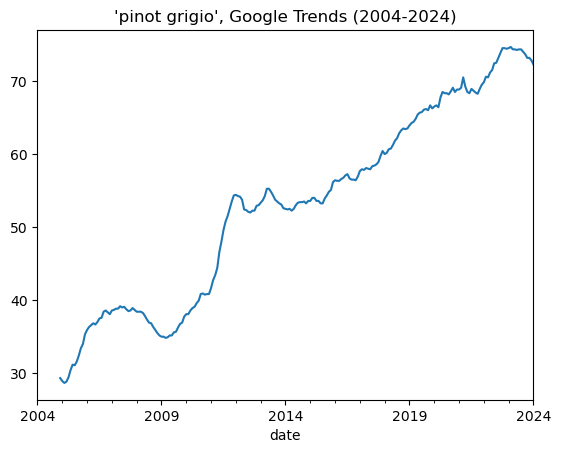

In [150]:
kw_grigio = ['pinot grigio']
pytrends.build_payload(kw_grigio, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

grigio_data = pytrends.interest_over_time()
grigio_data['moving_avg'] = grigio_data['pinot grigio'].rolling(window=12).mean()
grigio_data['moving_avg'].plot()
plt.title("'pinot grigio', Google Trends (2004-2024)")
plt.show()

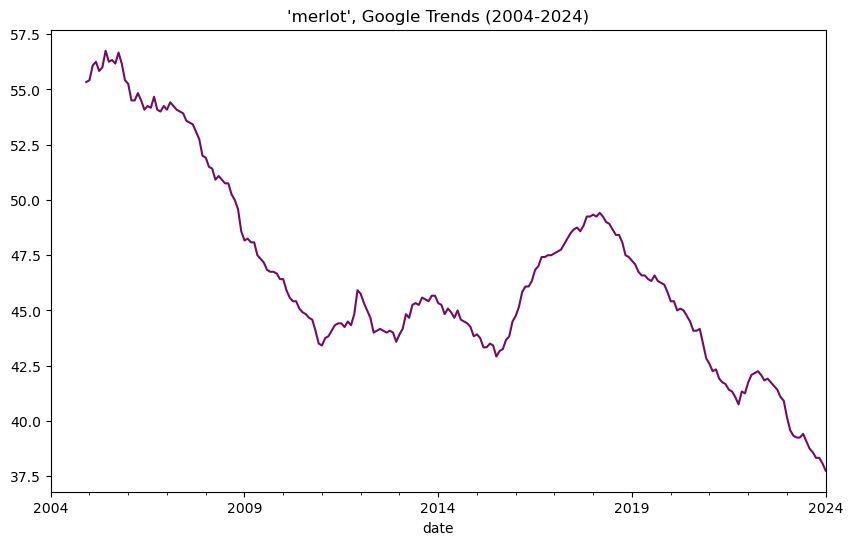

In [151]:
kw_merlot = ['merlot']
pytrends.build_payload(kw_merlot, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

merlot_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
merlot_data['moving_avg'] = merlot_data['merlot'].rolling(window=12).mean()
merlot_data['moving_avg'].plot(color='#730C64')
plt.title("'merlot', Google Trends (2004-2024)")
plt.show()

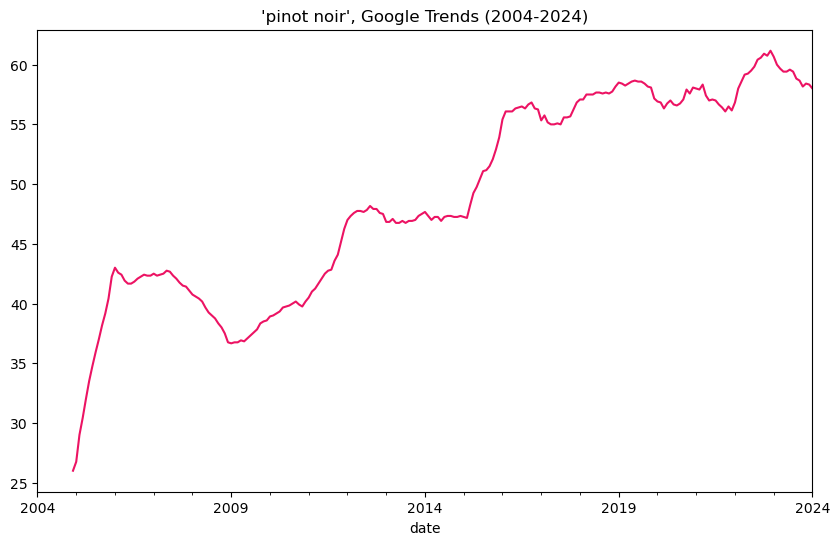

In [69]:
kw_noir = ['pinot noir']
pytrends.build_payload(kw_noir, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

noir_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
noir_data['moving_avg'] = noir_data['pinot noir'].rolling(window=12).mean()
noir_data['moving_avg'].plot(color='#EC1363')
plt.title("'pinot noir', Google Trends (2004-2024)")
plt.show()

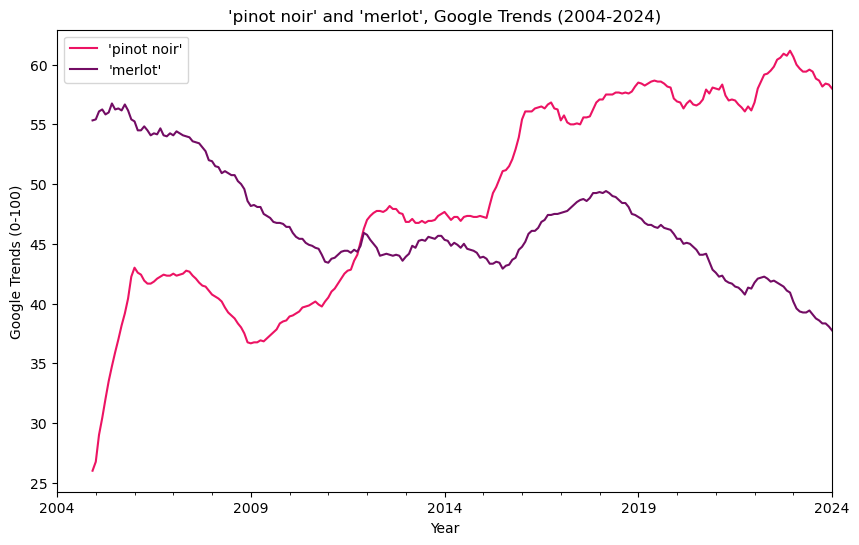

In [70]:
kw_noir = ['pinot noir']
pytrends.build_payload(kw_noir, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

plt.figure(figsize=(10,6))

noir_data = pytrends.interest_over_time()
noir_data['moving_avg'] = noir_data['pinot noir'].rolling(window=12).mean()
noir_data['moving_avg'].plot(color='#EC1363', label="'pinot noir'")

kw_merlot = ['merlot']
pytrends.build_payload(kw_merlot, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

merlot_data = pytrends.interest_over_time()
merlot_data['moving_avg'] = merlot_data['merlot'].rolling(window=12).mean()
merlot_data['moving_avg'].plot(color='#730C64', label="'merlot'")

plt.title("'pinot noir' and 'merlot', Google Trends (2004-2024)")
plt.xlabel('Year')
plt.ylabel('Google Trends (0-100)')
plt.legend()
plt.show()

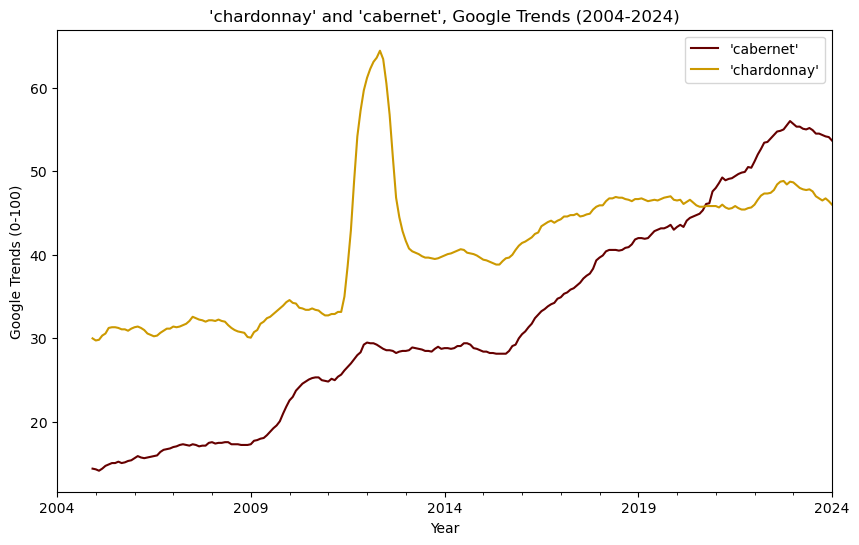

In [269]:
kw_cab = ['cabernet sauvignon']
pytrends.build_payload(kw_cab, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

plt.figure(figsize=(10,6))

cab_data = pytrends.interest_over_time()
cab_data['moving_avg'] = cab_data['cabernet sauvignon'].rolling(window=12).mean()
cab_data['moving_avg'].plot(color='#660000', label="'cabernet'")

kw_chard = ['chardonnay']
pytrends.build_payload(kw_chard, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

chard_data = pytrends.interest_over_time()
chard_data['moving_avg'] = chard_data['chardonnay'].rolling(window=12).mean()
chard_data['moving_avg'].plot(color='#cc9900', label="'chardonnay'")
plt.title("'chardonnay' and 'cabernet', Google Trends (2004-2024)")
plt.xlabel('Year')
plt.ylabel('Google Trends (0-100)')
plt.legend()
plt.show()

In [72]:
chard_data['moving_avg'].max()

64.41666666666667

In [73]:
merlot_data['moving_avg'].max()

56.75

In [74]:
kw_zin = ['zinfandel wine', 'zinfandel']
pytrends.build_payload(kw_zin, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

zin_data = pytrends.interest_over_time()
zin_data['moving_avg'] = zin_data['zinfandel wine'].rolling(window=12).mean()
zin_data['moving_avg'].plot()
plt.title("'zinfandel wine', Google Trends (2004-2024)")
plt.show()

TooManyRequestsError: The request failed: Google returned a response with code 429

In [ ]:
kw_syrah = ['syrah', 'syrah wine']
pytrends.build_payload(kw_syrah, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

syrah_data = pytrends.interest_over_time()
syrah_data['moving_avg'] = syrah_data['syrah'].rolling(window=12).mean()
syrah_data['moving_avg'].plot(color='#a217e8')
#plt.figure(figsize=(10,6))
plt.title("'syrah', Google Trends (2004-2024)")
plt.show()

In [ ]:
kw_french = ['colombard'] # colombard wine is apparently not searched for
pytrends.build_payload(kw_french, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

french_data = pytrends.interest_over_time()
french_data['moving_avg'] = french_data['colombard'].rolling(window=12).mean()
french_data['moving_avg'].plot()
plt.title("'colombard', Google Trends (2004-2024)")
plt.show()

In [ ]:
kw_petite = ['petite sirah']
pytrends.build_payload(kw_petite, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

petite_data = pytrends.interest_over_time()
petite_data['moving_avg'] = petite_data['petite sirah'].rolling(window=12).mean()
petite_data['moving_avg'].plot(color='#28004d')
plt.title("'petite sirah', Google Trends (2004-2024)")
plt.show()

In [ ]:
kw_rubi = ['rubired']
pytrends.build_payload(kw_rubi, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

rubi_data = pytrends.interest_over_time()
rubi_data['moving_avg'] = rubi_data['rubired'].rolling(window=12).mean()
rubi_data['moving_avg'].plot()
plt.title("'rubired', Google Trends (2004-2024)")
plt.show()

In [ ]:
kw_chard = ['chardonnay']
pytrends.build_payload(kw_chard, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

chard_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
chard_data['moving_avg'] = chard_data['chardonnay'].rolling(window=12).mean()
chard_data['moving_avg'].plot(color='#cc9900')
plt.title("'chardonnay', Google Trends (2004-2024)")
plt.show()

In [ ]:
kw_sauv = ['sauvignon blanc']
pytrends.build_payload(kw_sauv, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

sauv_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
sauv_data['moving_avg'] = sauv_data['sauvignon blanc'].rolling(window=12).mean()
sauv_data['moving_avg'].plot()
plt.title("'sauvignon blanc', Google Trends (2004-2024)")
plt.show()

In [75]:
top_varieties_list

['CABERNET SAUVIGNON',
 'CHARDONNAY',
 'SAUVIGNON BLANC',
 'PETITE SIRAH',
 'ZINFANDEL',
 'FRENCH COLOMBARD',
 'CHENIN BLANC',
 'SYRAH',
 'PINOT NOIR',
 'PINOT GRIS',
 'MERLOT',
 'RUBIRED']

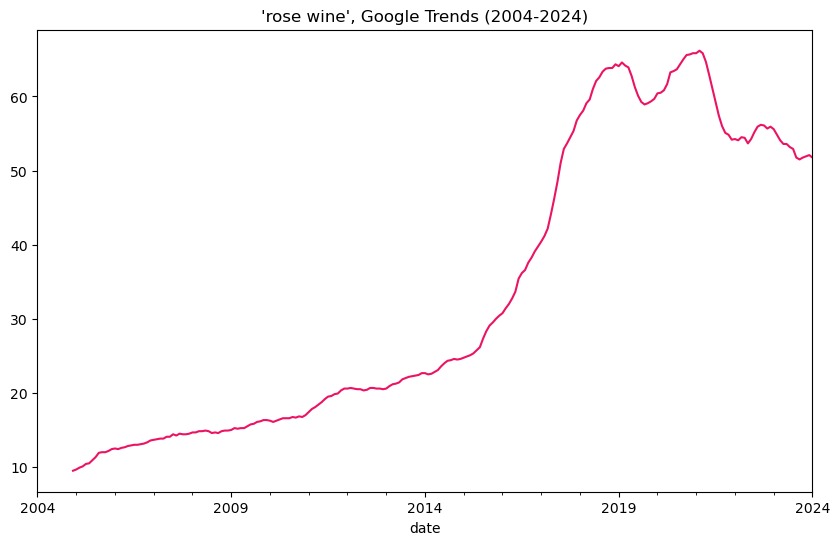

In [14]:
kw_rose = ['rose wine']
pytrends.build_payload(kw_rose, cat=0, timeframe='2004-01-01 2024-01-01', geo='US')

rose_data = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
rose_data['moving_avg'] = rose_data['rose wine'].rolling(window=12).mean()
rose_data['moving_avg'].plot(color='#EC1363')
plt.title("'rose wine', Google Trends (2004-2024)")
plt.show()